## Library Import


In [746]:
import pandas as pd
import numpy as np

In [747]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',context='notebook')
Data.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type',
       'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude',
       'source', 'time'],
      dtype='object')

In [748]:
Data = pd.read_csv('apartments.csv', sep=';', encoding='latin-1')

## Types of data

In [749]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [750]:
Data['amenities'].value_counts()

amenities
Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 225
Pool                                                                                                                                    171
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Clubhouse,Dishwasher,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Refrigerator                                      1
Cable or S

In [751]:
Data['amenities']=Data['amenities'].replace(np.nan,'Nothing')

In [752]:
Data['bathrooms']=Data['bathrooms'].fillna(0)

In [753]:
Data['bedrooms']=Data['bedrooms'].fillna(0)

In [754]:
Data['fee'].value_counts()

fee
No    10000
Name: count, dtype: int64

In [755]:
Data['currency'].value_counts()

currency
USD    10000
Name: count, dtype: int64

In [756]:
Data=Data.drop(columns='fee')

In [757]:
Data=Data.drop(columns='currency')

In [758]:
Data['has_photo'].value_counts()

has_photo
Thumbnail    8907
Yes           909
No            184
Name: count, dtype: int64

In [759]:
Data['pets_allowed'].value_counts()


pets_allowed
Cats,Dogs    5228
Cats          485
Dogs          124
Name: count, dtype: int64

In [760]:
Data['pets_allowed']=Data['pets_allowed'].fillna('No')

In [761]:
Data['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs    5228
No           4163
Cats          485
Dogs          124
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

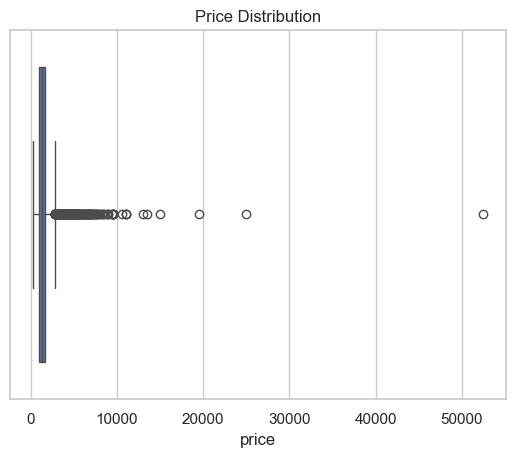

In [762]:
sns.boxplot(x=Data['price'])
plt.title('Price Distribution')

In [763]:
Data['price_display'].value_counts()

price_display
$1,350    86
$1,250    81
$850      79
$1,100    77
$1,400    74
          ..
$1,667     1
$2,053     1
$813       1
$1,228     1
$4,790     1
Name: count, Length: 1726, dtype: int64

In [764]:
Data_Clean=Data.copy()

In [765]:
Data_Clean=Data_Clean.drop(columns='price_display')

In [766]:
Data_Clean['price_type'].value_counts()

price_type
Monthly           9998
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64

In [767]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Weekly'].index)


In [768]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Monthly|Weekly'].index)


In [769]:
Data_Clean=Data_Clean.drop(columns='price_type')

In [770]:
Data_Clean['address'].value_counts()

address
908 8th SW St                3
901 Hidden Valley Drive      3
500 Sleepy Hollow Rd         3
1050 Manhattan Boulevard     2
1624 Jennifer Road           2
                            ..
2300 Woodland Crossing Dr    1
2050 E 15th Avenue           1
1728 Barton Springs Road     1
1915 Patzman St              1
9908 Bentcross Dr            1
Name: count, Length: 6658, dtype: int64

In [771]:
Data_Clean['category'].value_counts()


category
housing/rent/apartment     9994
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

In [772]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/apartment','apartment')

In [773]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/home','home')

In [774]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/short_term','short_term')

In [775]:
Data_Clean['category'].value_counts()

category
apartment     9994
home             2
short_term       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Square feet distribution')

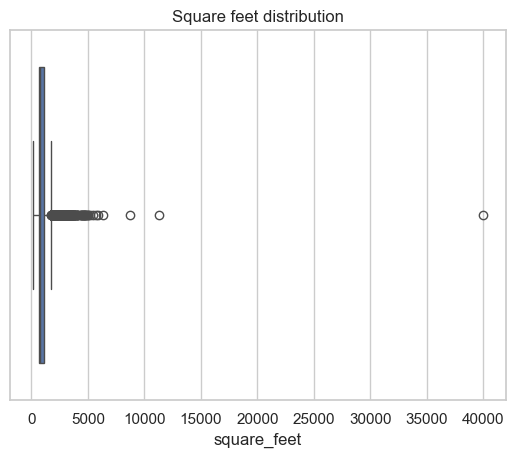

In [776]:
sns.boxplot(x=Data['square_feet'])
plt.title('Square feet distribution')

In [777]:
Data['cityname'].value_counts().size

1574

In [778]:
Data['state'].value_counts().size

51

In [779]:
Data_Clean['bathrooms']=Data_Clean['bathrooms'].astype(float).astype(int)

In [780]:
Data_Clean['bedrooms']=Data_Clean['bedrooms'].astype(float).astype(int)

In [781]:
Data_Clean['time']=pd.to_datetime(Data_Clean['time'],unit='s')

In [782]:
Data_Clean=Data_Clean.drop(columns=['title','body','address','latitude','longitude','id','time'])

In [783]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9998 non-null   object
 1   amenities     9998 non-null   object
 2   bathrooms     9998 non-null   int32 
 3   bedrooms      9998 non-null   int32 
 4   has_photo     9998 non-null   object
 5   pets_allowed  9998 non-null   object
 6   price         9998 non-null   int64 
 7   square_feet   9998 non-null   int64 
 8   cityname      9921 non-null   object
 9   state         9921 non-null   object
 10  source        9998 non-null   object
dtypes: int32(2), int64(2), object(7)
memory usage: 859.2+ KB


In [784]:
Data_Clean.describe()

,bathrooms,bedrooms,price,square_feet
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.342168,1.743049,1486.391278,945.949690
std,0.584591,0.943057,1076.547225,655.747081
min,0.000000,0.000000,200.000000,101.000000
25%,1.000000,1.000000,949.000000,649.000000
50%,1.000000,2.000000,1270.000000,802.500000
75%,2.000000,2.000000,1695.000000,1100.000000
max,8.000000,9.000000,52500.000000,40000.000000


In [785]:
Data_Clean.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source
0,apartment,Nothing,0,0,Thumbnail,No,790,101,Washington,DC,RentLingo
1,apartment,Nothing,0,1,Thumbnail,No,425,106,Evansville,IN,RentLingo
2,apartment,Nothing,1,0,Thumbnail,No,1390,107,Arlington,VA,RentLingo
3,apartment,Nothing,1,0,Thumbnail,No,925,116,Seattle,WA,RentLingo
4,apartment,Nothing,0,0,Thumbnail,No,880,125,Arlington,VA,RentLingo


## Integer Conversion

In [786]:
from sklearn.preprocessing import LabelEncoder

Col_to_enc = ['category', 'amenities', 'has_photo', 'pets_allowed', 'cityname', 'state', 'source']


for col in Col_to_enc:
    if col in Data_Clean.columns:  
        le = LabelEncoder()
        Data_Clean[col + '_encoded'] = le.fit_transform(Data_Clean[col])


In [787]:
Data_Clean_Enc=Data_Clean.select_dtypes(int,float)


In [788]:
Data_Clean_Enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bathrooms             9998 non-null   int32
 1   bedrooms              9998 non-null   int32
 2   price                 9998 non-null   int64
 3   square_feet           9998 non-null   int64
 4   category_encoded      9998 non-null   int32
 5   amenities_encoded     9998 non-null   int32
 6   has_photo_encoded     9998 non-null   int32
 7   pets_allowed_encoded  9998 non-null   int32
 8   cityname_encoded      9998 non-null   int32
 9   state_encoded         9998 non-null   int32
 10  source_encoded        9998 non-null   int32
dtypes: int32(9), int64(2)
memory usage: 585.8 KB


In [789]:
Data_Clean_Enc.to_csv('apartments_clean.csv',index=False)